In [1]:
import os, math
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime, read
from obspy.clients.fdsn import Client
from obspy.core import Stream
from obspy.signal.filter import bandpass
from obspy.signal.cross_correlation import correlate
from obspy.geodetics import locations2degrees, gps2dist_azimuth
from tqdm import tqdm
import pickle

In [2]:
client = Client("IRIS")
network = "*"
channel = "BH?"
location = "*"
start_day = UTCDateTime("2022-01-01")
nb_days = 10
region = dict(minlatitude=33, maxlatitude=36, minlongitude=-119, maxlongitude=-116)

In [3]:
inv = client.get_stations(network=network, starttime=start_day, endtime=start_day + 86400 * nb_days,
                          minlatitude=region['minlatitude'], maxlatitude=region['maxlatitude'],
                          minlongitude=region['minlongitude'], maxlongitude=region['maxlongitude'],
                          channel=channel, level="channel")

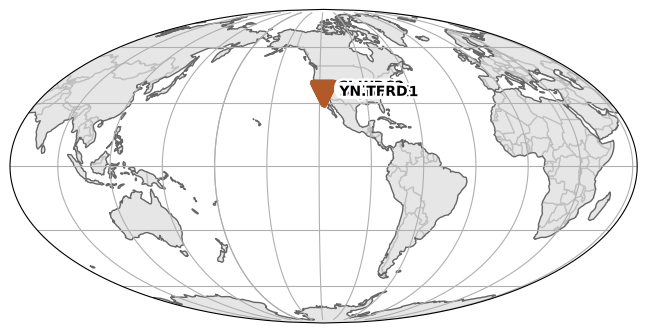

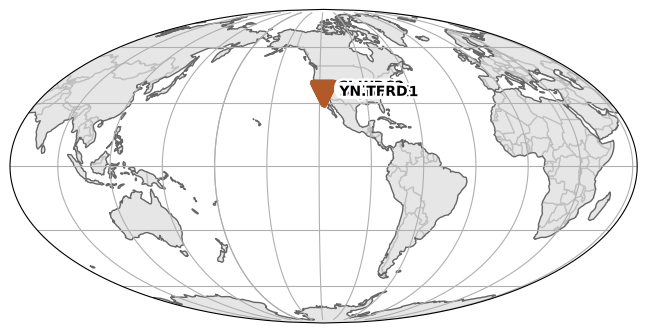

In [4]:
inv.plot()

In [5]:
stations = []
for net in inv:
    for sta in net:
        for cha in sta:
            stations.append({
                'network': net.code,
                'station': sta.code,
                'location': cha.location_code,
                'channel': cha.code,
                'latitude': sta.latitude,
                'longitude': sta.longitude
            })

unique = {(s['network'], s['station'], s['location'], s['channel']): s for s in stations}
stat = list(unique.values())

print(f"Found {len(stat)} station-channels in region.")
for s in stat[:10]:
    print(s['network'], s['station'], s['location'], s['channel'], s['latitude'], s['longitude'])

Found 582 station-channels in region.
AZ BZN  BHE 33.4915 -116.667
AZ BZN  BHN 33.4915 -116.667
AZ BZN  BHZ 33.4915 -116.667
AZ CRY  BHE 33.5654 -116.7373
AZ CRY  BHN 33.5654 -116.7373
AZ CRY  BHZ 33.5654 -116.7373
AZ FRD  BHE 33.4947 -116.6022
AZ FRD  BHN 33.4947 -116.6022
AZ FRD  BHZ 33.4947 -116.6022
AZ KNW  BHE 33.7141 -116.7119
